# Prepare data

In [1]:
import pandas as pd
adult_census = pd.read_csv("../datasets/adult-census-numeric.csv")

In [2]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [5]:
## Separate target var from the main dataset
target_name = "class"
target = adult_census[target_name]

data = adult_census.drop(columns=[target_name])

In [6]:
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [8]:
data.shape

(39073, 4)

In [9]:
data.shape[0]

39073

# Build model

k nearest neighbor classifier predicts the label of the new sample by looking at the k-nearest-neighbors in the dataset and finding a sample that resembles it the most.
It is a very simplistic model, so it is not used very often in practice. Useful for understanding and getting started with ML though.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
# instantiate a new K-nearest model
# the model instance is also called an 'estimator' in scikit-learn
model = KNeighborsClassifier()

In [13]:
# train the model (fit() is an in-place method... discard the output in the garbage var _ )
_ = model.fit(data, target)

In [14]:
# Make predictions on the data we've trained the model on
target_predicted = model.predict(data)

In [15]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [17]:
# compare with the original data 
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [20]:
# check if predictions are correct
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [21]:
# Now on the entire data set.
# calculate the average accuracy (on trained data... e.g. data that the model has already seen... check its 'memorizing' capability)
(target == target_predicted).mean()

0.8242776341719346

This is quite a low accuracy. You would expect 100% accuracy here. But, the k-nearest-neighbor algorithm is quite simplistic. Also, by default the 5 nearest neighbors are searched and the average of those is taken. Probably the results are 100% correct when amount of neighbors is set to 1.

# Introduce a test set

# load a test data set. One that the model has not seen before
adult_census_test = pd.read_csv("../datasets/adult-census-numeric-test.csv")

In [23]:
adult_census_test.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,20,0,0,35,<=50K
1,53,0,0,72,>50K
2,41,0,0,50,>50K
3,20,0,0,40,<=50K
4,25,0,0,40,<=50K


In [24]:
# Separate target from features
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

In [25]:
data_test.shape[0]

9769

In [27]:
# calculate the accuracy using scikit-learn's builtin score method
# score first does a model.predict() and then outputs the accuracy
accuracy = model.score(data_test, target_test)
accuracy

0.8037670181185382

# 📝 Exercise : Adapting your first model
The goal of this exercise is to fit a similar model as we just did to get familiar with manipulating scikit-learn objects and in particular the `.fit/.predict/.score` API.

Before we used `model = KNeighborsClassifier()`. All scikit-learn models can be created without arguments. This is convenient because it means that you don’t need to understand the full details of a model before starting to use it.

One of the KNeighborsClassifier parameters is n_neighbors. It controls the number of neighbors we are going to use to make a prediction for a new data point.

#### 1. What is the default value of the n_neighbors parameter? 
Hint: Look at the documentation on the scikit-learn website or directly access the description inside your notebook by running the following cell. This will open a pager pointing to the documentation.
```python
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier?
```
**Correct answer: 5**




1. What is the default value of the n_neighbors parameter? 

In [ ]:
KNeighborsClassifier?


#### 2. Create a KNeighborsClassifier model with n_neighbors=50
a. Fit this model on the data and target loaded above

b. Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?

c. Compute the accuracy on the training data.

d. Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.

**Correct answer: You should see a small improvement**

In [66]:
# Fit this model on the data and target loaded above
model2 = KNeighborsClassifier(n_neighbors=50)
_ = model2.fit(data, target)

In [67]:
#  Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?

In [68]:
target2_predicted = model2.predict(data)

In [69]:
target[:5] == target2_predicted[:5]

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

In [70]:
(target == target2_predicted).mean()

0.8290379545978042

In [71]:
accuracy2 = model2.score(data_test, target_test)
accuracy2

0.8177909714402702

#### 3. (Optional) Find the optimal n_neighbors
What is the optimal number of neighbors to fit a K-neighbors classifier on this dataset?

In [ ]:
score = []

for i in range(1,100):
    model3 = KNeighborsClassifier(n_neighbors=i)
    _ = model3.fit(data, target)
    acc = model3.score(data_test, target_test)
    
    score.append(acc)

In [60]:
import pandas as pd
df = pd.DataFrame(score, range(1,100))

df.describe()

,0
count,99.000000
mean,0.817529
std,0.007916
min,0.750537
25%,0.817177
50%,0.818712
75%,0.819787
max,0.825264


In [65]:
df[:10]

,0
1,0.750537
2,0.813901
3,0.795373
4,0.808066
5,0.803767
6,0.822397
7,0.801515
8,0.825059
9,0.822909
10,0.825264


Text(0, 0.5, 'score')

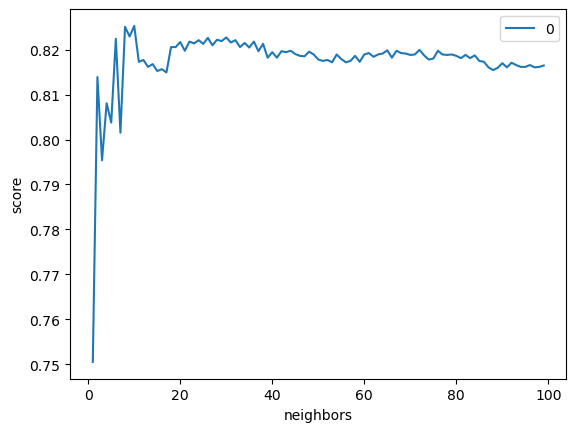

In [64]:
plot = df.plot.line()

plot.set_xlabel("neighbors")
plot.set_ylabel("score")